Anyone can get the 16 digit and other details from a credit card.

There are some rule based method like - If the card is from India, and it is used in USA for buying a costly thing from a store, where the card was never used before. So, it could be a fraud.



The dataset contains only the numerical values. If there is any name,address etc.. then are converted to numbers for maintaining privacy.

In [1]:
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

In [3]:
data = pd.read_csv('creditcard.csv')

## Data exploration

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#normalize the amount value
from sklearn.preprocessing import StandardScaler

data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'], axis=1)

In [6]:
data.head()  #to check wheather coloumn has been dropped or not

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [7]:
data = data.drop(['Time'],axis=1) #time is also not needed
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [10]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [11]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [13]:
X_train.shape

(199364, 29)

In [14]:
X_test.shape

(85443, 29)

## Deep neural network

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [16]:
model = Sequential([
    Dense(units=16,input_dim = 29, activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-trainabl

In [22]:
from keras.engine.training import optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
13291/13291 [==============================] - 34s 2ms/step - loss: 0.0106 - accuracy: 0.9976
Epoch 2/5
13291/13291 [==============================] - 36s 3ms/step - loss: 0.0039 - accuracy: 0.9994
Epoch 3/5
13291/13291 [==============================] - 40s 3ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 42s 3ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0035 - accuracy: 0.9994


In [23]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 6s 2ms/step - loss: 0.0043 - accuracy: 0.9994
[0.004311252851039171, 0.9993914365768433]


In [24]:
y_pred = model.predict(X_test)

2671/2671 [==============================] - 4s 1ms/step


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Overall Precision:",precision_score(y_test, y_pred.round(), average='macro'))
print("Overall Recall:",recall_score(y_test, y_pred.round(), average='macro'))

Overall Accuracy: 0.9993914071369217
Overall Precision: 0.9310984413565223
Overall Recall: 0.8842482265838243


In [28]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_test, y_pred.round())
print(mcm)

[[85278    18]
 [   34   113]]


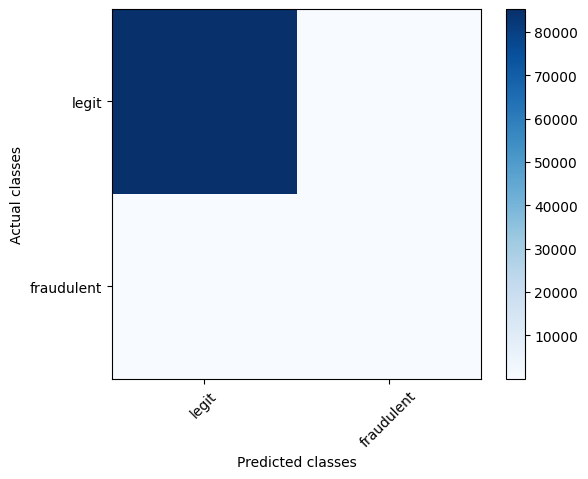

In [29]:
from matplotlib import pyplot as plt
%matplotlib inline

activity_classes = ['legit', 'fraudulent']

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(activity_classes))
plt.xticks(tick_marks, activity_classes, rotation=45)
plt.yticks(tick_marks, activity_classes)
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

8901/8901 [==============================] - 14s 2ms/step
[[284261     54]
 [   111    381]]


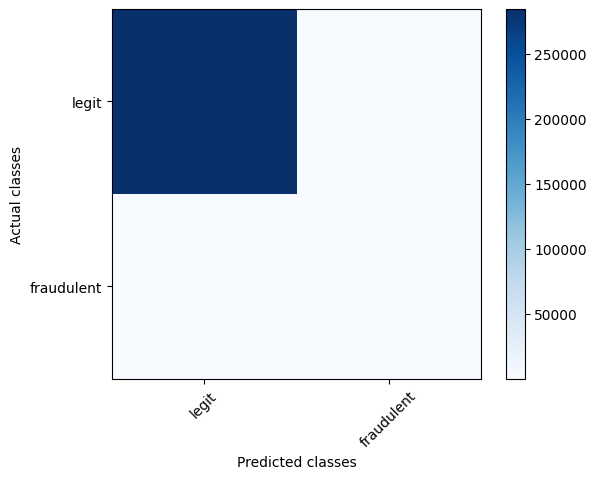

In [30]:
# check the confusion matrix for all dataset

y_total_pred = model.predict(X)
mcm_total = confusion_matrix(y, y_total_pred.round())
print(mcm_total)

plt.imshow(mcm_total, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(activity_classes))
plt.xticks(tick_marks, activity_classes, rotation=45)
plt.yticks(tick_marks, activity_classes)
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

## Decision trees

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [48]:
dtree.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier()

In [49]:
y_pred_dtree = dtree.predict(X_test)

In [50]:
print("Overall Accuracy:",accuracy_score(y_test, y_pred_dtree))
print("Overall Precision:",precision_score(y_test, y_pred_dtree, average='macro'))
print("Overall Recall:",recall_score(y_test, y_pred_dtree, average='macro'))

Overall Accuracy: 0.9992392589211521
Overall Precision: 0.8962175589202188
Overall Recall: 0.8773810241598046


[[85267    29]
 [   36   111]]


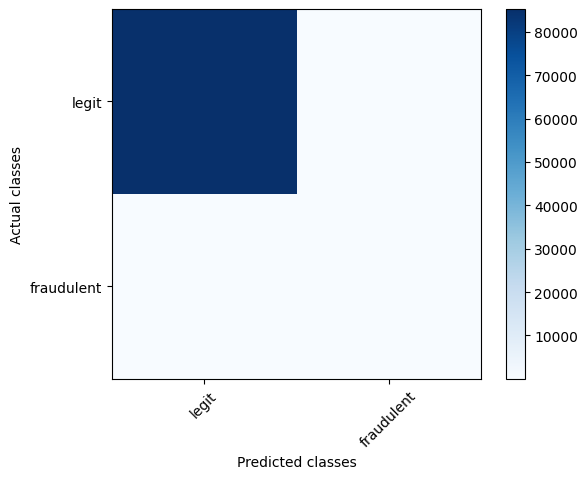

In [51]:
mcm_dtree = confusion_matrix(y_test, y_pred_dtree)
print(mcm_dtree)

plt.imshow(mcm_dtree, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(activity_classes))
plt.xticks(tick_marks, activity_classes, rotation=45)
plt.yticks(tick_marks, activity_classes)
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

## Random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

In [32]:
rfc.fit(X_train, y_train.values.ravel()) #after .values, the panda dataframe has to be flattened by .ravel()

RandomForestClassifier()

In [43]:
y_pred_rfc = rfc.predict(X_test)

In [45]:
print("Overall Accuracy:",accuracy_score(y_test, y_pred_rfc))
print("Overall Precision:",precision_score(y_test, y_pred_rfc, average='macro'))
print("Overall Recall:",recall_score(y_test, y_pred_rfc, average='macro'))

Overall Accuracy: 0.9995435553526912
Overall Precision: 0.9748066172075525
Overall Recall: 0.8877199304032248


[[85290     6]
 [   33   114]]


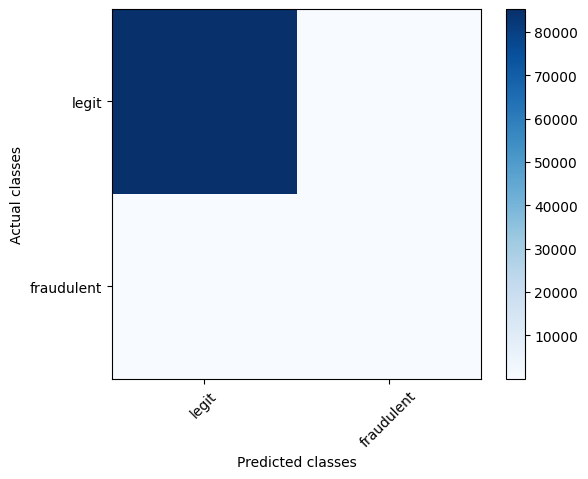

In [46]:
mcm_rfc = confusion_matrix(y_test, y_pred_rfc)
print(mcm_rfc)

plt.imshow(mcm_rfc, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(activity_classes))
plt.xticks(tick_marks, activity_classes, rotation=45)
plt.yticks(tick_marks, activity_classes)
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

# Applying sampling techniques

The dataset is imbalanced. Generally, only few percent of transactions are fraudulent and most of the transactions are genuine.

**We will use sampling technique here.**

suppose we have a dataset where 6 male and 3 female.

*   Undersampling -  (delete 3 male out of the 6 male) + 3 female
*   Oversampling - 6 male + (twice the 3 females)





## Undersampling

In [52]:
fraud_indices = np.array(data[data.Class ==1].index)
numbers_fraud = len(fraud_indices)
print(f'number of fraudulent transactions are = {numbers_fraud}')

genuine_indices = np.array(data[data.Class ==0].index)
numbers_genuine = len(genuine_indices)
print(f'number of genuine transactions are = {numbers_genuine}')

number of fraudulent transactions are = 492
number of genuine transactions are = 284315


In [54]:
#Taking randomly genuine transactions of length same as fraudulent transactions
random_genuine_indices = np.random.choice (genuine_indices, numbers_fraud, replace=False)
random_genuine_indices = np.array(random_genuine_indices)
print(len(random_genuine_indices)) #print to check wheather it is same value or not

492


In [55]:
undersample_indices = np.concatenate([fraud_indices,random_genuine_indices]) #getting indices for making one dataset
print(len(undersample_indices)) #it should be double length

984


In [58]:
undersample_data = data.iloc[undersample_indices,:] #making one dataset

In [61]:
X = undersample_data.iloc[:, undersample_data.columns != 'Class']
y = undersample_data.iloc[:, undersample_data.columns == 'Class']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Deep learning

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-trainabl

In [64]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
46/46 [==============================] - 2s 5ms/step - loss: 0.4999 - accuracy: 0.8997
Epoch 2/5
46/46 [==============================] - 0s 4ms/step - loss: 0.2034 - accuracy: 0.9201
Epoch 3/5
46/46 [==============================] - 0s 5ms/step - loss: 0.1770 - accuracy: 0.9259
Epoch 4/5
46/46 [==============================] - 0s 4ms/step - loss: 0.1583 - accuracy: 0.9346
Epoch 5/5
46/46 [==============================] - 0s 5ms/step - loss: 0.1511 - accuracy: 0.9390


10/10 [==============================] - 0s 4ms/step
Overall Accuracy: 0.9256756756756757
Overall Precision: 0.929523896806122
Overall Recall: 0.930312629114447
 
 
[[136   1]
 [ 21 138]]
 
 


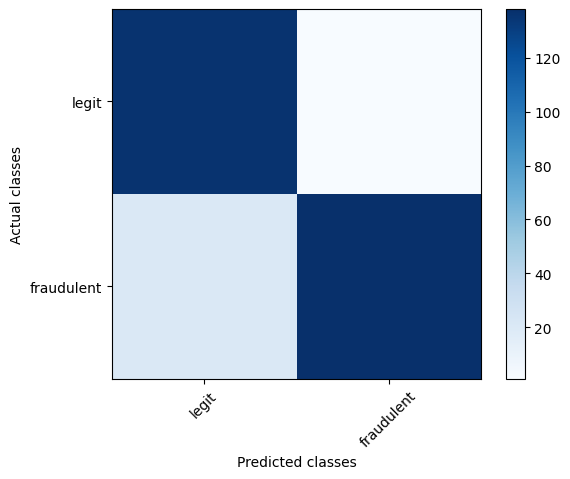

In [67]:
y_pred = model.predict(X_test)

print("Overall Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Overall Precision:",precision_score(y_test, y_pred.round(), average='macro'))
print("Overall Recall:",recall_score(y_test, y_pred.round(), average='macro'))

print(' \n ')

# Print the confusion matrix
mcm = confusion_matrix(y_test, y_pred.round())
print(mcm)

print(' \n ')

#Now plot the confusion matrix
activity_classes = ['legit', 'fraudulent']

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(activity_classes))
plt.xticks(tick_marks, activity_classes, rotation=45)
plt.yticks(tick_marks, activity_classes)
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

## Oversampling

one such oversampling technique is "SMOTE"

In [68]:
from imblearn.over_sampling import SMOTE

In [78]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [79]:
X_resample, y_resample = SMOTE().fit_resample(X_train,y_train)
#we are applying oversampling only on the training data, so that our testing data is not affected

In [83]:
X_train.shape

(199364, 29)

In [84]:
X_resample.shape

(398016, 29)

So, this technique is increasing the sample size

### Deep learning

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-trainabl

In [86]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
13291/13291 [==============================] - 40s 3ms/step - loss: 0.0041 - accuracy: 0.9994
Epoch 2/5
13291/13291 [==============================] - 37s 3ms/step - loss: 0.0037 - accuracy: 0.9994
Epoch 3/5
13291/13291 [==============================] - 53s 4ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 30s 2ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 5/5
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0034 - accuracy: 0.9994


2671/2671 [==============================] - 6s 2ms/step
Overall Accuracy: 0.9994733330992591
Overall Precision: 0.9209119681162818
Overall Recall: 0.9116416210241349
 
 
[[85286    21]
 [   24   112]]
 
 


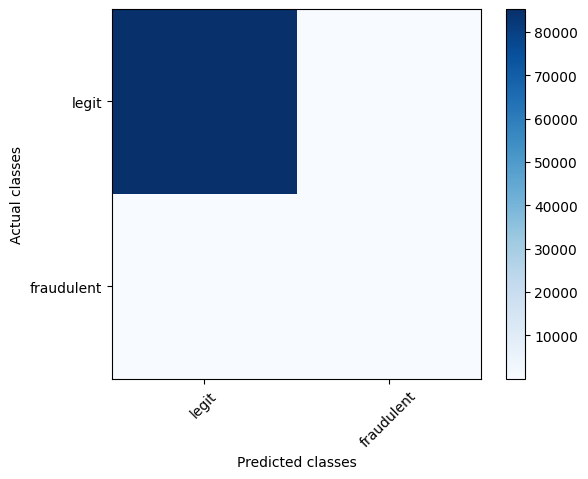

In [87]:
y_pred = model.predict(X_test)

print("Overall Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Overall Precision:",precision_score(y_test, y_pred.round(), average='macro'))
print("Overall Recall:",recall_score(y_test, y_pred.round(), average='macro'))

print(' \n ')

# Print the confusion matrix
mcm = confusion_matrix(y_test, y_pred.round())
print(mcm)

print(' \n ')

#Now plot the confusion matrix
activity_classes = ['legit', 'fraudulent']

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(activity_classes))
plt.xticks(tick_marks, activity_classes, rotation=45)
plt.yticks(tick_marks, activity_classes)
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()